# Kernel Learning

Let's start looking at a few kernels

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as pl
import sklearn.metrics.pairwise as pw

In [3]:
help(pw.polynomial_kernel)

Help on function polynomial_kernel in module sklearn.metrics.pairwise:

polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)
    Compute the polynomial kernel between X and Y::
    
        K(X, Y) = (gamma <X, Y> + coef0)^degree
    
    Read more in the :ref:`User Guide <polynomial_kernel>`.
    
    Parameters
    ----------
    X : ndarray of shape (n_samples_1, n_features)
    
    Y : ndarray of shape (n_samples_2, n_features)
    
    degree : int, default 3
    
    gamma : float, default None
        if None, defaults to 1.0 / n_samples_1
    
    coef0 : int, default 1
    
    Returns
    -------
    Gram matrix : array of shape (n_samples_1, n_samples_2)



Let's generate some data and have some look at kernel functions

In [4]:
x = pl.linspace(-3, 3, 100).reshape(100,1)

In [5]:
def colvec(a):
    return np.array(a).reshape(len(a), 1)

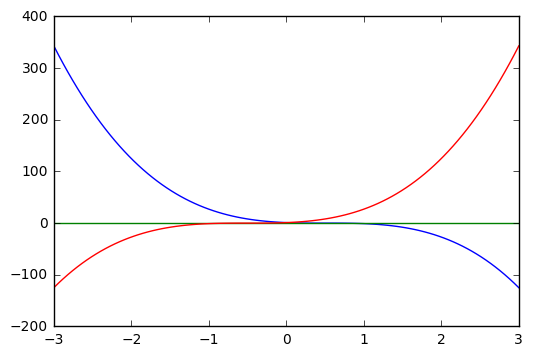

In [6]:
pl.plot(x, pw.polynomial_kernel(x, colvec([-2, 0, 2]), coef0=1, degree=3))

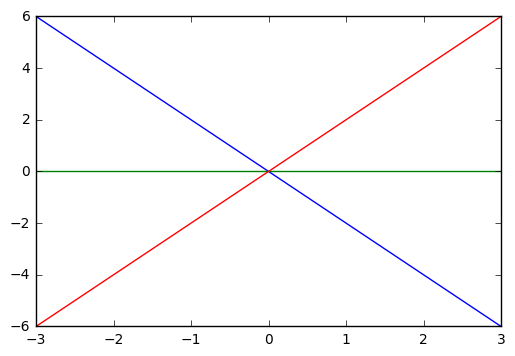

In [7]:
pl.plot(x, pw.linear_kernel(x, colvec([-2, 0, 2])))

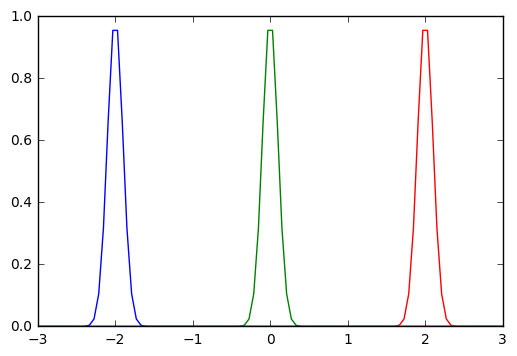

In [8]:
pl.plot(x, pw.rbf_kernel(x, colvec([-2, 0, 2]), gamma=50))

# some 1d classification problem

In [9]:
x = np.r_[pl.randn(50, 1) + 3, pl.randn(50, 1) - 3]
y = np.r_[pl.ones(50), -pl.ones(50)]
xp = colvec(np.linspace(-8, 8, 1000))

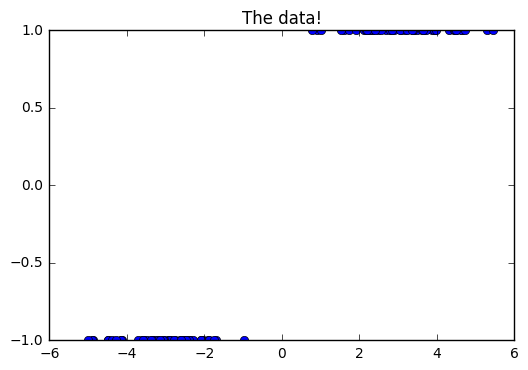

In [10]:
pl.plot(x, colvec(y), 'o'); pl.title("The data!")

In [11]:
from sklearn import svm

In [12]:
cl = svm.SVC(kernel='linear', C=1)
cl.fit(x,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

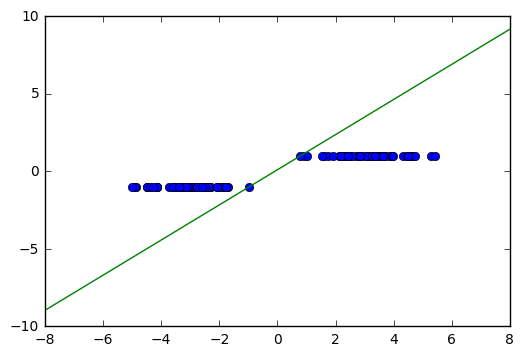

In [13]:
pl.plot(x, colvec(y), 'o'); pl.plot(xp, cl.decision_function(xp), '-')

Try different settings for C to see how regularization affects the location of the hyperplane. Note how for large C, the boundary is really exactly at the value of 1, the margin!

## rbf kernel

In [14]:
cl = svm.SVC(kernel='rbf', C=1, gamma=1)
cl.fit(x,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

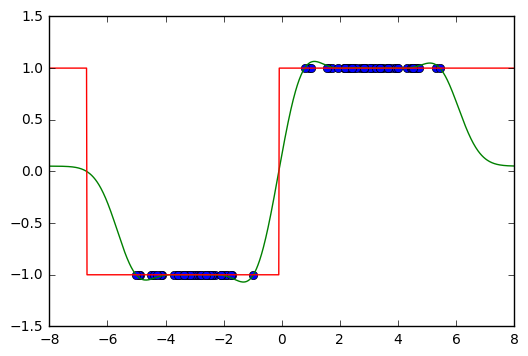

In [15]:
pl.plot(x, colvec(y), 'o')
pl.plot(xp, cl.decision_function(xp), '-')
pl.plot(xp, cl.predict(xp), 'r-')

Again, try different value for C and rbf to try out different kernel widths

## MINST data set

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

3

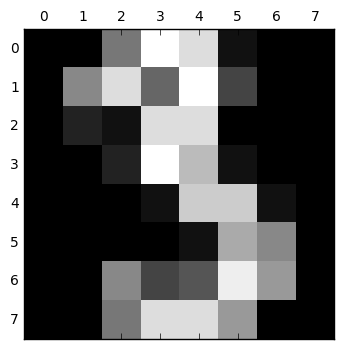

In [17]:
pl.gray()
i = 3
pl.matshow(digits.images[i])
digits.target[i]

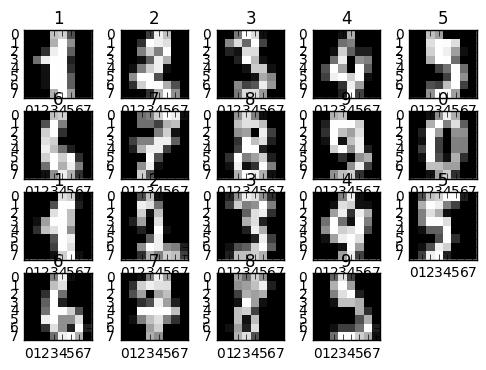

In [18]:
for i in range(1, 20):
    pl.subplot(4, 5, i)
    pl.imshow(digits.images[i], interpolation='none')
    pl.title(digits.target[i])
    

In [19]:
c = svm.SVC()

In [20]:
digits.images.shape

(1797, 8, 8)

In [21]:
digits.data.shape

(1797, 64)

In [22]:
def oneVsRest(ds, c):
    i1 = ds.target == c
    i2 = ~i1
    return ds.data[i1 | i2], i1.astype('int') - i2.astype('int')

In [23]:
oneVsRest(digits, 1)

(array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]]),
 array([-1,  1, -1, ..., -1, -1, -1]))

In [24]:
x, y = oneVsRest(digits, 1)

In [25]:
c.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
c.score(x, y)

1.0

In [27]:
import sklearn.metrics as mt

In [28]:
mt.zero_one_loss(y, c.predict(x))

0.0

# Training / Test splits

In [30]:
import sklearn.model_selection as cv

In [31]:
x, y = oneVsRest(digits, 1)
xt, xe, yt, ye = cv.train_test_split(x, y)

In [32]:
c = svm.SVC(kernel='poly', C=100, gamma=0.001)
c.fit(xt, yt)
c.score(xe, ye)

0.99777777777777776

# Full grid search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = {'kernel': ['rbf'], 'gamma': np.logspace(-3, 3, 7), 'C': np.logspace(-3, 3, 7)}

In [42]:
gc = GridSearchCV(svm.SVC(), params, verbose=0)

In [43]:
gc.fit(x, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03]), 'kernel': ['rbf'], 'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
gc.best_params_

{'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}

In [45]:
gc.best_score_

0.98998330550918201

In [46]:
c = gc.best_estimator_

In [47]:
c.support_vectors_.shape

(161, 64)

In [48]:
c.dual_coef_.shape

(1, 161)

In [49]:
c.support_vectors_.shape

(161, 64)

# Support vectors studies

In [50]:
x, y = oneVsRest(digits, 7)

array([ 359.,  381.,  304.,  166.,  156.,  156.,  156.,  156.,  156.])

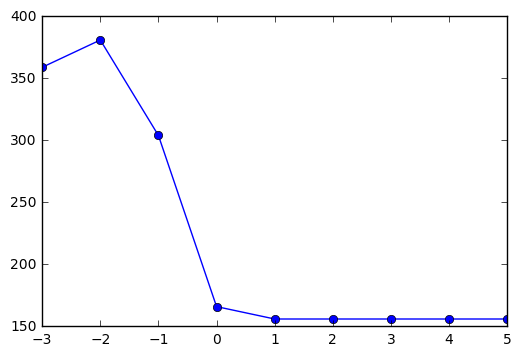

In [51]:
Cs = np.logspace(-3, 5, 9)
numsv = np.zeros(len(Cs))
for i in range(len(Cs)):
    c = svm.SVC(kernel='rbf', gamma=0.001, C=Cs[i])
    c.fit(x,y)
    numsv[i] = c.support_vectors_.shape[0]

pl.plot(np.log10(Cs), numsv, 'o-')
numsv
    

In [52]:
def showFit(c, x, y):
    mins = x.min(axis=0)
    maxs = x.max(axis=0)
    mx, my = np.meshgrid(np.linspace(mins[0], maxs[0]), np.linspace(mins[1], maxs[1]))
    z = c.decision_function(np.c_[mx.ravel(), my.ravel()])
    pl.contour(mx, my, z.reshape(mx.shape), [-1, 0, 1])
    
    # plot data
    pos = y == 1
    neg = y == -1
    pl.plot(x[pos,0], x[pos,1], 'r+')
    pl.plot(x[neg, 0], x[neg, 1], 'b.')
    pl.jet()
    
    # plot support vectors
    pl.plot(c.support_vectors_[:,0], c.support_vectors_[:,1], 'ko', fillstyle='none')
    pl.grid()

In [53]:
import sklearn.datasets as datasets

In [54]:
x, y = datasets.make_blobs(100, 2, 2); y = 2*y-1

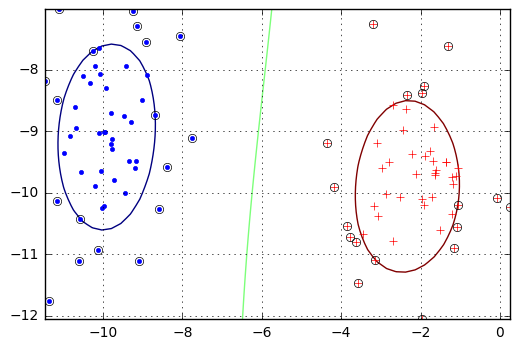

In [102]:
c = svm.SVC(kernel='rbf', C=.1, gamma=.1)
c.fit(x,y)
showFit(c, x, y)